#Wgranie bibliotek

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

#Przetwarzanie danych

##Wczytanie pliku oraz zapoznanie się z danymi

In [ ]:
laptop_price=pd.read_csv('laptop_price.csv', encoding='latin-1')

In [ ]:
laptop_price.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [ ]:
laptop_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


## Uporządkowanie danych:

###usunięcie 'kg' i 'GB' w kolumnach Weight i Ram

In [ ]:
laptop_price['Ram'] = laptop_price['Ram'].str.replace('GB', '')
laptop_price['Weight'] = laptop_price['Weight'].str.replace('kg', '')

In [ ]:
laptop_price.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


###praca z kolumną "Memory"

In [ ]:
laptop_price['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

zamiana TB na GB, usunięcie spacji z nazw rodzajów dysków

In [ ]:
laptop_price['Memory'] = laptop_price['Memory'].str.replace('Flash Storage', 'Flash_Storage')
laptop_price['Memory'] = laptop_price['Memory'].str.replace('1TB', '1000GB')
laptop_price['Memory'] = laptop_price['Memory'].str.replace('1.0TB', '1000GB')
laptop_price['Memory'] = laptop_price['Memory'].str.replace('2TB', '2000GB')

<ipython-input-6-29d037c68b4e>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  laptop_price['Memory'] = laptop_price['Memory'].str.replace('1.0TB', '1000GB')


In [ ]:
laptop_price['Memory'].unique()

array(['128GB SSD', '128GB Flash_Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash_Storage', '1000GB HDD',
       '32GB Flash_Storage', '128GB SSD +  1000GB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash_Storage',
       '256GB SSD +  1000GB HDD', '256GB SSD +  2000GB HDD', '32GB SSD',
       '2000GB HDD', '64GB SSD', '1000GB Hybrid',
       '512GB SSD +  1000GB HDD', '1000GB SSD', '256GB SSD +  500GB HDD',
       '128GB SSD +  2000GB HDD', '512GB SSD +  512GB SSD', '16GB SSD',
       '16GB Flash_Storage', '512GB SSD +  256GB SSD',
       '512GB SSD +  2000GB HDD', '64GB Flash_Storage +  1000GB HDD',
       '180GB SSD', '1000GB HDD +  1000GB HDD', '32GB HDD',
       '1000GB SSD +  1000GB HDD', '512GB Flash_Storage', '128GB HDD',
       '240GB SSD', '8GB SSD', '508GB Hybrid',
       '512GB SSD +  1000GB Hybrid', '256GB SSD +  1000GB Hybrid'],
      dtype=object)

In [134]:
laptop_price['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

In [135]:
laptop_price['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

utworzenie nowych kolumn (pamięć/ typ dysku + dodatkowe dla laptopów, które posiadają 2 różne dyski) - dzielimy spacją

In [ ]:
df=laptop_price['Memory'].str.split(" ", expand = True)

In [ ]:
df

,0,1,2,3,4,5
0,128GB,SSD,None,None,None,None
1,128GB,Flash_Storage,None,None,None,None
2,256GB,SSD,None,None,None,None
3,512GB,SSD,None,None,None,None
4,256GB,SSD,None,None,None,None
...,...,...,...,...,...,...
1298,128GB,SSD,None,None,None,None
1299,512GB,SSD,None,None,None,None
1300,64GB,Flash_Storage,None,None,None,None
1301,1000GB,HDD,None,None,None,None


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1303 non-null   object
 1   1       1303 non-null   object
 2   2       208 non-null    object
 3   3       208 non-null    object
 4   4       208 non-null    object
 5   5       208 non-null    object
dtypes: object(6)
memory usage: 61.2+ KB


In [ ]:
df=df.rename(columns={0:'Memory', 1:'Drive_type', 4:'Additional_memory', 5:'Additional_drive_type'})

df.2 i df.3 zawierały plusy i spacje (usuwamy)

In [ ]:
df.drop(3, axis=1, inplace=True)

In [ ]:
df.drop(2, axis=1, inplace=True)

In [ ]:
df

,Memory,Drive_type,Additional_memory,Additional_drive_type
0,128GB,SSD,None,None
1,128GB,Flash_Storage,None,None
2,256GB,SSD,None,None
3,512GB,SSD,None,None
4,256GB,SSD,None,None
...,...,...,...,...
1298,128GB,SSD,None,None
1299,512GB,SSD,None,None
1300,64GB,Flash_Storage,None,None
1301,1000GB,HDD,None,None


##Mergowanie nowego df z pierwotną tabelą

###dodanie indeksów do tabel

In [ ]:
df['index'] = df.index

In [ ]:
df

,Memory,Drive_type,Additional_memory,Additional_drive_type,index
0,128GB,SSD,None,None,0
1,128GB,Flash_Storage,None,None,1
2,256GB,SSD,None,None,2
3,512GB,SSD,None,None,3
4,256GB,SSD,None,None,4
...,...,...,...,...,...
1298,128GB,SSD,None,None,1298
1299,512GB,SSD,None,None,1299
1300,64GB,Flash_Storage,None,None,1300
1301,1000GB,HDD,None,None,1301


In [ ]:
laptop_price['index'] = laptop_price.index

In [ ]:
laptop_price.drop('Memory', axis=1, inplace=True)

In [ ]:
laptop_price.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,index
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,1
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.00,2
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,2537.45,3
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,4


###funkcja merge (łączymy tabele po indeksach)

In [ ]:
laptop = pd.merge(laptop_price, df, on='index', how='left')

In [ ]:
laptop

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,index,Memory,Drive_type,Additional_memory,Additional_drive_type
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,128GB,SSD,None,None
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,1,128GB,Flash_Storage,None,None
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.00,2,256GB,SSD,None,None
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,2537.45,3,512GB,SSD,None,None
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,4,256GB,SSD,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,Intel HD Graphics 520,Windows 10,1.8,638.00,1298,128GB,SSD,None,None
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,Intel HD Graphics 520,Windows 10,1.3,1499.00,1299,512GB,SSD,None,None
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,Intel HD Graphics,Windows 10,1.5,229.00,1300,64GB,Flash_Storage,None,None
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,AMD Radeon R5 M330,Windows 10,2.19,764.00,1301,1000GB,HDD,None,None


In [ ]:
laptop.drop('index', axis=1, inplace=True)

##Zmiana typu zmiennych

### uzupełniamy braki danych

zmieniany None na Nan, żeby uzupełnić Nany zerami

In [ ]:
laptop['Additional_memory'].replace(to_replace=[None], value=np.nan)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1298    NaN
1299    NaN
1300    NaN
1301    NaN
1302    NaN
Name: Additional_memory, Length: 1303, dtype: object

In [ ]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   laptop_ID              1303 non-null   int64  
 1   Company                1303 non-null   object 
 2   Product                1303 non-null   object 
 3   TypeName               1303 non-null   object 
 4   Inches                 1303 non-null   float64
 5   ScreenResolution       1303 non-null   object 
 6   Cpu                    1303 non-null   object 
 7   Ram                    1303 non-null   object 
 8   Gpu                    1303 non-null   object 
 9   OpSys                  1303 non-null   object 
 10  Weight                 1303 non-null   object 
 11  Price_euros            1303 non-null   float64
 12  Memory                 1303 non-null   object 
 13  Drive_type             1303 non-null   object 
 14  Additional_memory      208 non-null    object 
 15  Addi

In [ ]:
laptop['Memory'] = laptop['Memory'].str.replace('GB', '')


In [ ]:
laptop['Memory'].unique()

array(['128', '256', '512', '500', '1000', '32', '64', '2000', '16',
       '180', '240', '8', '508'], dtype=object)

In [ ]:
laptop['Additional_memory'].unique()

array([None, '1000GB', '256GB', '2000GB', '500GB', '512GB'], dtype=object)

In [ ]:
laptop['Additional_memory'] = laptop['Additional_memory'].str.replace('GB', '')

In [ ]:
laptop['Additional_memory'].unique()

array([None, '1000', '256', '2000', '500', '512'], dtype=object)

In [ ]:
laptop['Additional_memory'] = laptop['Additional_memory'].str.replace('GB', '')

In [ ]:
laptop['Additional_memory'].unique()

array([None, '1000', '256', '2000', '500', '512'], dtype=object)

In [ ]:
laptop['Additional_memory'] = laptop['Additional_memory'].fillna(0)

In [ ]:
laptop['Additional_memory'].unique()

array([0, '1000', '256', '2000', '500', '512'], dtype=object)

In [ ]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   laptop_ID              1303 non-null   int64  
 1   Company                1303 non-null   object 
 2   Product                1303 non-null   object 
 3   TypeName               1303 non-null   object 
 4   Inches                 1303 non-null   float64
 5   ScreenResolution       1303 non-null   object 
 6   Cpu                    1303 non-null   object 
 7   Ram                    1303 non-null   object 
 8   Gpu                    1303 non-null   object 
 9   OpSys                  1303 non-null   object 
 10  Weight                 1303 non-null   object 
 11  Price_euros            1303 non-null   float64
 12  Memory                 1303 non-null   object 
 13  Drive_type             1303 non-null   object 
 14  Additional_memory      1303 non-null   object 
 15  Addi

###zamiana object na int, float

In [ ]:
laptop['Ram'] = laptop['Ram'].astype(int)
laptop['Weight'] = laptop['Weight'].astype(float)
laptop['Memory'] = laptop['Memory'].astype(int)
laptop['Additional_memory'] = laptop['Additional_memory'].astype(int)

In [ ]:
laptop.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Memory,Drive_type,Additional_memory,Additional_drive_type
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128,SSD,0,None
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,128,Flash_Storage,0,None
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.00,256,SSD,0,None
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,2537.45,512,SSD,0,None
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,256,SSD,0,None


In [ ]:
laptop=laptop.rename(columns={'Ram':'Ram_GB', 'Weight':'Weight_KG', 'Memory':'Memory_GB', 'Additional_memory':'Additional_memory_GB' })

In [ ]:
laptop.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram_GB,Gpu,OpSys,Weight_KG,Price_euros,Memory_GB,Drive_type,Additional_memory_GB,Additional_drive_type
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,128,SSD,0,None
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,128,Flash_Storage,0,None
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.00,256,SSD,0,None
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,2537.45,512,SSD,0,None
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,256,SSD,0,None


In [88]:
laptop['Memory_total_GB'] = laptop['Memory_GB'] + laptop['Additional_memory_GB']

In [89]:
laptop.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram_GB,Gpu,OpSys,...,Price_euros,Memory_GB,Drive_type,Additional_memory_GB,Additional_drive_type,Company_code,Drive_type_code,TypeName_code,Additional_drivetype_code,Memory_total_GB
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,...,1339.69,128,SSD,0,None,1,3,4,-1,128
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,...,898.94,128,Flash_Storage,0,None,1,0,4,-1,128
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,...,575.00,256,SSD,0,None,7,3,3,-1,256
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,...,2537.45,512,SSD,0,None,1,3,4,-1,512
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,...,1803.60,256,SSD,0,None,1,3,4,-1,256


In [ ]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   laptop_ID              1303 non-null   int64  
 1   Company                1303 non-null   object 
 2   Product                1303 non-null   object 
 3   TypeName               1303 non-null   object 
 4   Inches                 1303 non-null   float64
 5   ScreenResolution       1303 non-null   object 
 6   Cpu                    1303 non-null   object 
 7   Ram_GB                 1303 non-null   int64  
 8   Gpu                    1303 non-null   object 
 9   OpSys                  1303 non-null   object 
 10  Weight_KG              1303 non-null   float64
 11  Price_euros            1303 non-null   float64
 12  Memory_GB              1303 non-null   int64  
 13  Drive_type             1303 non-null   object 
 14  Additional_memory_GB   1303 non-null   int64  
 15  Addi

In [75]:
laptop['Company_code'] = laptop.Company.astype('category').cat.codes
laptop['Drive_type_code'] = laptop.Drive_type.astype('category').cat.codes
laptop['TypeName_code'] = laptop.TypeName.astype('category').cat.codes
laptop['Additional_drivetype_code'] = laptop.Additional_drive_type.astype('category').cat.codes

In [136]:
laptop['Cpu'] = laptop['Cpu'].str.replace(' 2GHz', ' 2.0GHz')
laptop['Cpu'] = laptop['Cpu'].str.replace(' 3GHz', ' 3.0GHz')

In [137]:
laptop['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3.0GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2.0GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3.0GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Cele

In [140]:
laptop['Cpu_speed_GHz']=laptop['Cpu'].str[-7:]

In [141]:
laptop['Cpu_speed_GHz'] = laptop['Cpu_speed_GHz'].str.replace('GHz', '')
laptop['Cpu_speed_GHz'] = laptop['Cpu_speed_GHz'].str.replace(' ', '')

In [142]:
laptop['Cpu_speed_GHz'].unique()

array(['2.3', '1.8', '2.5', '2.7', '3.1', '3.0', '2.2', '1.6', '2.0',
       '2.8', '1.2', '2.9', '2.4', '1.44', '1.5', '1.9', '1.1', '1.3',
       '2.6', '3.6', '1.60', '3.2', '1.0', '2.1', '0.9', '1.92', '2.50',
       '2.70'], dtype=object)

In [143]:
laptop['Cpu_speed_GHz'] = laptop['Cpu_speed_GHz'].astype(float)

#Wizualizacja danych

## Rozkład zmiennej Price

<ipython-input-65-66bfdc31036c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(laptop_price['Price_euros'])


<Axes: xlabel='Price_euros', ylabel='Density'>

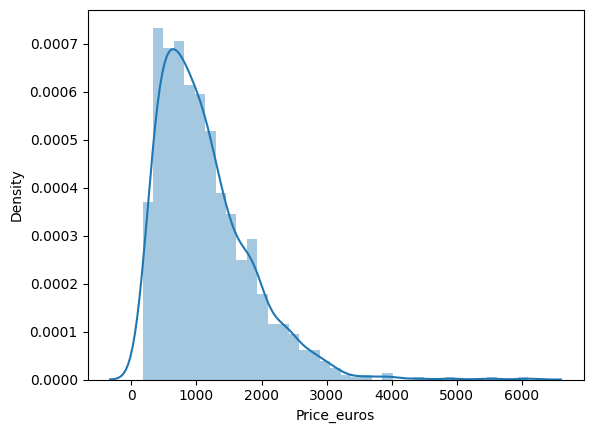

In [ ]:
sns.distplot(laptop_price['Price_euros'])

<Axes: >

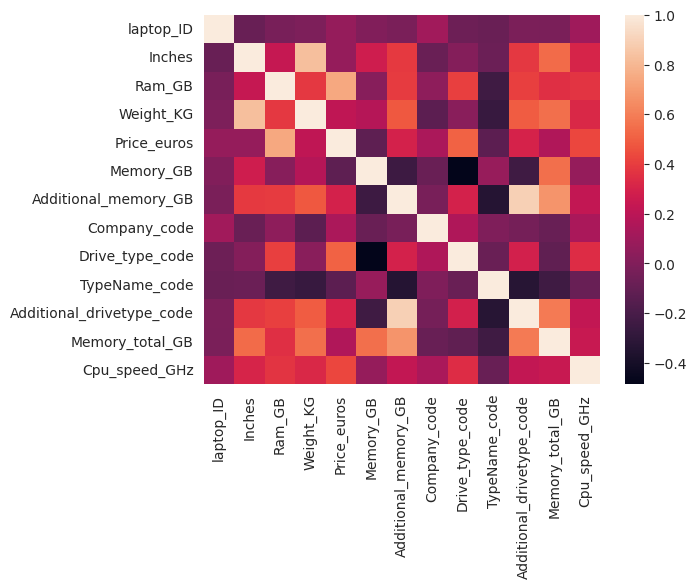

In [144]:
count_corr=laptop.corr()
sns.heatmap(count_corr)

In [145]:
laptop.corr()['Price_euros']

laptop_ID                    0.067830
Inches                       0.068197
Ram_GB                       0.743007
Weight_KG                    0.210370
Price_euros                  1.000000
Memory_GB                   -0.122365
Additional_memory_GB         0.295004
Company_code                 0.140371
Drive_type_code              0.510353
TypeName_code               -0.127313
Additional_drivetype_code    0.299575
Memory_total_GB              0.160819
Cpu_speed_GHz                0.430293
Name: Price_euros, dtype: float64

<Axes: >

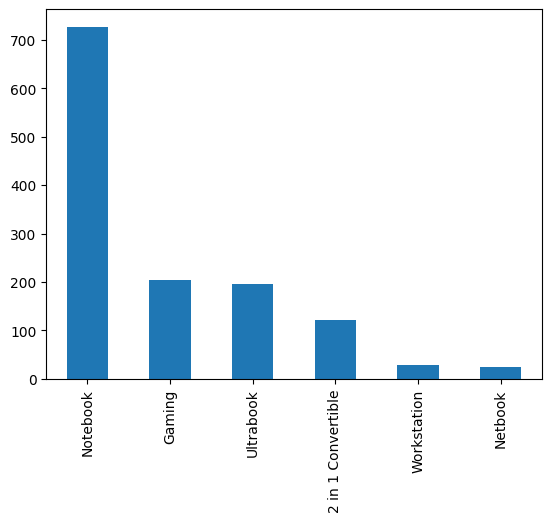

In [78]:
laptop['TypeName'].value_counts().plot(kind='bar')

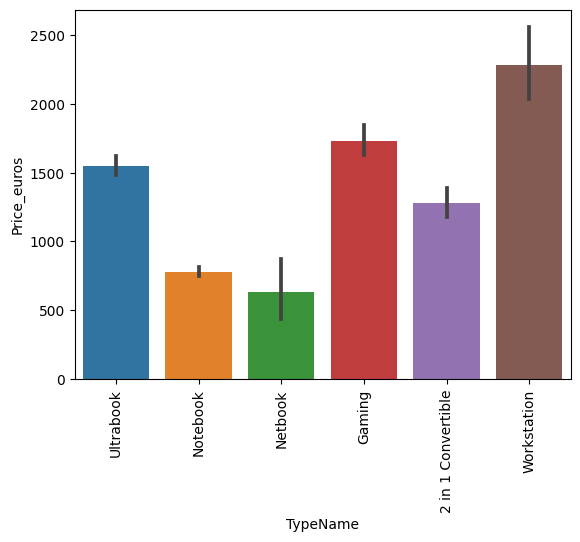

In [79]:
sns.barplot(x=laptop['TypeName'],y=laptop['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

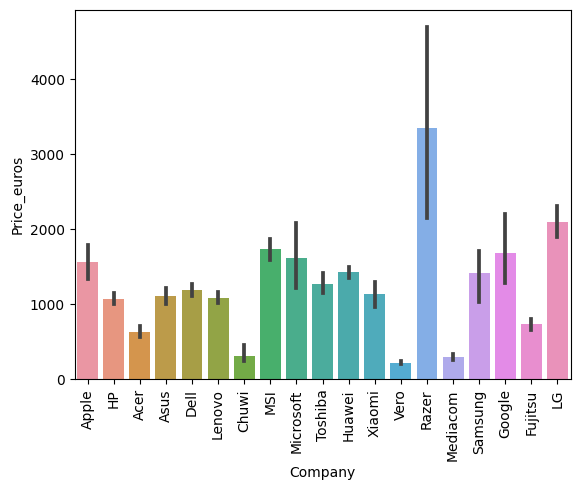

In [80]:
sns.barplot(x=laptop['Company'],y=laptop['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

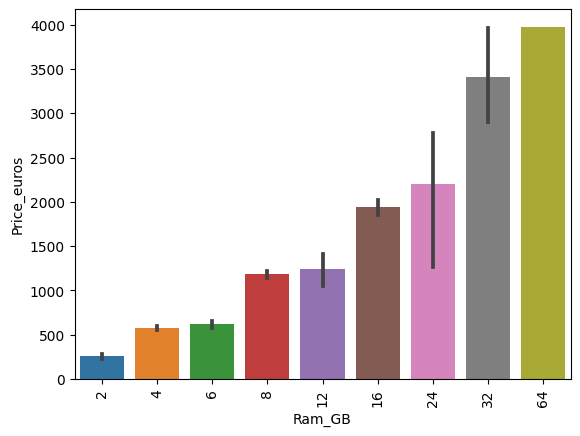

In [82]:
sns.barplot(x=laptop['Ram_GB'],y=laptop['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

In [85]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 0 to 1302
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   laptop_ID                  1303 non-null   int64  
 1   Company                    1303 non-null   object 
 2   Product                    1303 non-null   object 
 3   TypeName                   1303 non-null   object 
 4   Inches                     1303 non-null   float64
 5   ScreenResolution           1303 non-null   object 
 6   Cpu                        1303 non-null   object 
 7   Ram_GB                     1303 non-null   int64  
 8   Gpu                        1303 non-null   object 
 9   OpSys                      1303 non-null   object 
 10  Weight_KG                  1303 non-null   float64
 11  Price_euros                1303 non-null   float64
 12  Memory_GB                  1303 non-null   int64  
 13  Drive_type                 1303 non-null   objec

# ML regresja

In [169]:
X=laptop[['Ram_GB', 'Drive_type_code', 'Cpu_speed_GHz']]

In [170]:
y=laptop['Price_euros']

In [171]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=111)

In [172]:
model_lin=LinearRegression()
model_lin.fit(X_train, y_train)

LinearRegression()

In [173]:
y_lin_test=model_lin.predict(X_test)

In [174]:
y_lin_train=model_lin.predict(X_train)

In [175]:
r2_score(y_test, y_lin_test)

0.5320829392736686

In [176]:
mean_squared_error(y_test, y_lin_test)

198520.0072300371

In [177]:
dt=DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [178]:
y_pred_dt=dt.predict(X_test)

In [179]:
r2_score(y_test, y_pred_dt)

0.5936065913577744

In [186]:
mean_squared_error(y_test, y_pred_dt)

172417.7833923422

In [181]:
from sklearn import tree

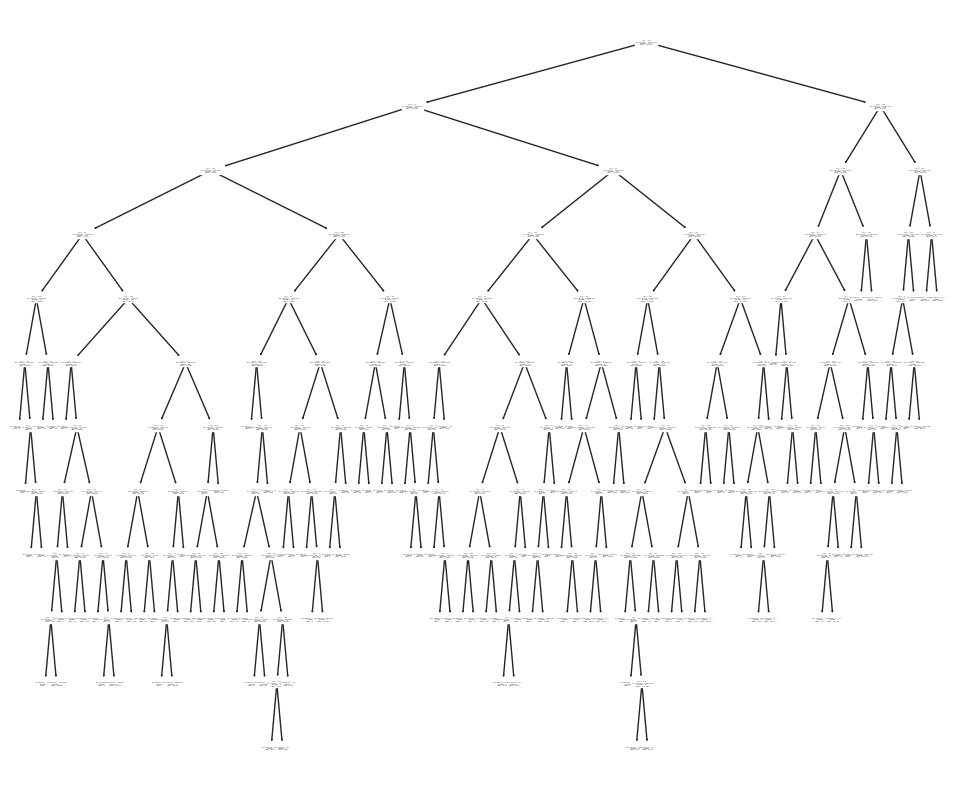

In [182]:
fig, ax=plt.subplots(figsize=(12, 10))
ax=tree.plot_tree(dt)
plt.show()

In [128]:
from sklearn.metrics import mean_absolute_percentage_error

In [187]:
bias_lin_test=mean_absolute_percentage_error(y_test, y_lin_test)
print(bias_lin_test)

0.3073669031311424


In [188]:
bias_lin_train=mean_absolute_percentage_error(y_train, y_lin_train)
print(bias_lin_train)

0.32779519259871104


In [189]:
variance_lin=bias_lin_test-bias_lin_train
print(variance_lin)

-0.02042828946756864
